In this notebook, we want to perform a factor analysis of several psychiatric surveys that participants took and look at these identified factors correlate with learning and memory.

Background on factor analysis: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5897159/

Python guide to factor analysis: https://www.datacamp.com/tutorial/introduction-factor-analysis


Steps involved:

1. Load the raw data
2. Clean the raw data
3. Conduct the factor analysis
4. Go back to the labelled data - what do the factors correspond to?
5. Correlate factor scores for individuals to their learning and memory behavior.


## Load the raw data

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving all_psych_data_raw.csv to all_psych_data_raw (4).csv
User uploaded file "all_psych_data_raw.csv" with length 155631 bytes


In [ ]:
import pandas as pd

raw_data = pd.read_csv('all_psych_data_raw.csv')

In [ ]:
raw_data.head(5)

,"all_psych_data_raw <- read.csv(""~/Desktop/all_psych_data_raw.csv"")"
0,View(all_psych_data_raw)


## Clean the raw data

What I mean by this is:

1. remove people who didn't complete the surveys (look for columns ending with "_complete"
2. remove people who failed the attention checks (columns beginning with "imc_" should be NaN - any entry there means the person was randomly pressing buttons)
3. remove columns we don't need (only need the columns pertaining to actual answers)

In [ ]:
raw_data.drop(raw_data[raw_data['sds_complete'] == 0].index, inplace=True)
raw_data.drop(raw_data[raw_data['stai_s_complete'] == 0].index, inplace=True)
raw_data.drop(raw_data[raw_data['stai_t_complete'] == 0].index, inplace=True)
raw_data.drop(raw_data[raw_data['oci_r_complete'] == 0].index, inplace=True)
raw_data.drop(raw_data[raw_data['imc_2'] >= 0].index, inplace=True)
raw_data.drop(raw_data[raw_data['imc_1'] >= 0].index, inplace=True)
pro_pids = raw_data["prolific_pid"].tolist()
raw_data.drop(columns=["record_id", "redcap_survey_identifier", "id_grab_timestamp", "record_id_e587ae", "prolific_pid", "study_id", "session_id", "correct_id", "prolific_pid_corrected", "id_grab_complete", "stai_s_timestamp", "stai_s_score", "stai_t_timestamp", "stai_t_score", "oci_r_timestamp", "ocirscore", "sds_timestamp", "sds_score", "sds_complete", "oci_r_complete", "stai_t_complete", "stai_s_complete",  "imc_2"], inplace=True)


KeyError: ignored

In [ ]:
raw_data.drop(columns=["imc_1"], inplace=True)

In [ ]:

raw_data

,stais1,stais2,stais3,stais4,stais5,stais6,stais7,stais8,stais9,stais10,...,q11sds,q12sds,q13sds,q14sds,q15sds,q16sds,q17sds,q18sds,q19sds,q20sds
2,4.0,3.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,4.0,...,4.0,4.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,4.0
3,3.0,4.0,1.0,1.0,3.0,1.0,2.0,2.0,1.0,3.0,...,3.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0
4,2.0,2.0,2.0,4.0,1.0,1.0,4.0,1.0,2.0,1.0,...,2.0,2.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,2.0
5,4.0,4.0,1.0,1.0,4.0,1.0,1.0,3.0,1.0,3.0,...,3.0,3.0,2.0,2.0,1.0,2.0,2.0,3.0,1.0,4.0
6,4.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,4.0,...,4.0,4.0,1.0,4.0,1.0,4.0,4.0,4.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,3.0,3.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,...,3.0,3.0,1.0,3.0,1.0,3.0,3.0,3.0,1.0,3.0
417,4.0,4.0,1.0,1.0,4.0,1.0,1.0,3.0,1.0,4.0,...,3.0,4.0,1.0,3.0,1.0,4.0,4.0,4.0,1.0,4.0
418,3.0,3.0,1.0,2.0,3.0,2.0,1.0,3.0,1.0,3.0,...,3.0,3.0,1.0,4.0,1.0,4.0,4.0,4.0,1.0,4.0
419,4.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,4.0,...,4.0,2.0,1.0,4.0,1.0,2.0,3.0,3.0,1.0,2.0


NameError: ignored

## Conduct the factor analysis

First, how many participants (rows) do we have left after cleaning?

In [ ]:
raw_data.shape[0]

399

Now let's begin the factor analysis as described here: https://www.datacamp.com/tutorial/introduction-factor-analysis

You will have to look up how to install Python modules inside of Google Colab. The one you need is called "factor_analyzer".

In [ ]:
!pip install factor_analyzer
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.5/202.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 25.9 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=a0b3490fdb1ff591c8f2580dfe19c939fbefe66d4b12e144166853d93f413b32
  Stored in directory: /root/.cache/pip/wheels/c5/94/da/41abe415f64706710726291086a814dd8b9e0dab1c491ef6ed
Successfully built factor_analyzer


In [ ]:
import numpy as np
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi2,p = calculate_bartlett_sphericity(raw_data)
print(chi2, p)
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(raw_data)
print(kmo_model)

24889.148820976872 0.0
0.9592433455258109


/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [ ]:
fa = FactorAnalyzer(rotation = None)
fa.fit(raw_data)
ev = fa.get_eigenvalues()
ev1=ev[0] #original eigenvalues
ev2=ev[1] #the common factor eigen values
print(ev1)

[29.18075702  5.82327119  3.59958709  2.43332141  1.8275877   1.68942399
  1.64796833  1.45370139  1.345164    1.31798531  1.17899675  1.13316846
  1.05805969  0.94137597  0.90704326  0.88335992  0.84119058  0.81183021
  0.77171417  0.75225837  0.71396136  0.7020635   0.6889509   0.64921585
  0.61483542  0.59656171  0.58558049  0.55447694  0.53692424  0.52315673
  0.49796526  0.48501074  0.4734319   0.45193468  0.43842722  0.41801242
  0.40649592  0.39563444  0.39183314  0.37106166  0.36609004  0.34938551
  0.34696316  0.33171147  0.32056823  0.31840945  0.29754868  0.28642592
  0.27890958  0.27648785  0.26245175  0.25281727  0.24671671  0.23438647
  0.22583749  0.22062885  0.21493906  0.20923251  0.20569834  0.20150544
  0.19439251  0.19001844  0.18227416  0.17320491  0.16289736  0.15594407
  0.14881175  0.14625728  0.14278737  0.1306371   0.12357864  0.11733234
  0.11047792  0.10763727  0.10131719  0.09629698  0.09259656  0.08352502]


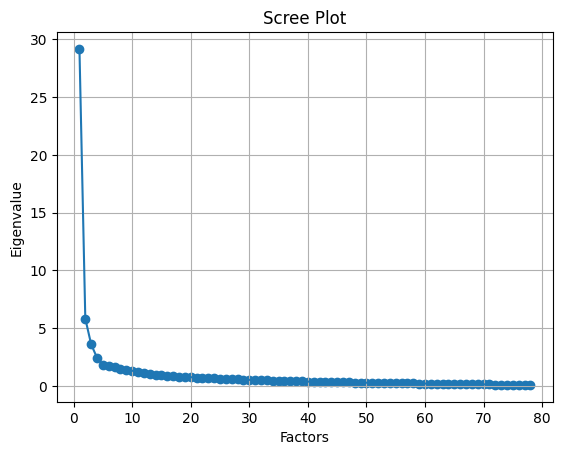

In [ ]:
plt.scatter(range(1,raw_data.shape[1]+1),ev1)
plt.plot(range(1, raw_data.shape[1]+1),ev1)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
fac = FactorAnalyzer(rotation="varimax")
fac.fit(raw_data, 13 )
loadings = pd.DataFrame(fac.loadings_, columns=['Factor 1', 'Factor 2', 'Factor 3'], index=raw_data.columns)
pd.options.display.max_rows = 999
print('Factor Loadings \n%s' %loadings)

Factor Loadings 
         Factor 1  Factor 2  Factor 3
stais1   0.519486 -0.579702 -0.035588
stais2   0.633203 -0.455676 -0.090138
stais3  -0.268369  0.766912  0.135997
stais4  -0.222814  0.692579  0.088847
stais5   0.585620 -0.572076 -0.034970
stais6  -0.135898  0.637836  0.149350
stais7  -0.357564  0.667384  0.218564
stais8   0.755753 -0.385315 -0.043920
stais9  -0.124228  0.658721  0.236322
stais10  0.632523 -0.542052 -0.039315
stais11  0.756744 -0.330656 -0.093084
stais12 -0.198983  0.779646  0.206683
stais13 -0.138869  0.711224  0.190138
stais14 -0.319551  0.487431  0.262021
stais15  0.593254 -0.592431 -0.009976
stais16  0.734693 -0.427152  0.003404
stais17 -0.332468  0.734325  0.147244
stais18 -0.246054  0.431967  0.220752
stais19  0.647256 -0.454407 -0.121061
stais20  0.709340 -0.414252 -0.025551
stait1   0.773431 -0.184386 -0.096183
stait2  -0.451678  0.475189  0.283691
stait3   0.785248 -0.184846 -0.113745
stait4  -0.504670  0.253635  0.301998
stait5  -0.621065  0.347889  0.23

In [ ]:
fa.get_factor_variance()

(array([28.72078068,  5.26955731,  3.14556057]),
 array([0.36821514, 0.06755843, 0.0403277 ]),
 array([0.36821514, 0.43577356, 0.47610126]))

## Go back to the labelled data - what do the factors correspond to?

Ok, so as we discussed, here you want take the factor loadings on each question and go back to the labelled data (which I emailed you). So, you have to do the following:

1. Load the labelled data
2. Clean it up just like you did the raw data at the very beginning. The best way to do this would be to duplicate the original raw data (pre-cleaning) and use the same code to clean the labelled data (but keep the raw data in the brackets to tell the .drop() function what to drop).
3. Map the factor loadings from above to the labelled data.
4. For each factor, list out 20 questions with the highest score for that factor. Assess each factor separately: what do 20 questions seem to have in common, if anything?
5. For each factor, if 20 questions all have something in common, increase the number from 20. If they don't seem to have much in common, decrease the number from 20.

In [ ]:
from google.colab import files
uploaded = files.upload()
labelled_data = pd.read_csv('all_psych_data_labelled.csv')

Saving all_psych_data_labelled.csv to all_psych_data_labelled.csv


In [ ]:
labelled_data.drop(labelled_data[labelled_data["Complete?"] == "Incomplete"].index, inplace=True)
labelled_data.drop(labelled_data[labelled_data["Complete?.2"] == "Incomplete"].index, inplace=True)
labelled_data.drop(labelled_data[labelled_data['Complete?.3'] == "Incomplete"].index, inplace=True)
labelled_data.drop(labelled_data[labelled_data['Complete?.4'] == "Incomplete"].index, inplace=True)
labelled_data.drop(labelled_data[labelled_data['15. I am thoroughly reading through these questions. If this is true, please leave this question blank.'] == "A little of the time"].index, inplace=True)
labelled_data.drop(labelled_data[labelled_data['15. I am thoroughly reading through these questions. If this is true, please leave this question blank.'] == "Some of the time"].index, inplace=True)
labelled_data.drop(labelled_data[labelled_data['15. I am thoroughly reading through these questions. If this is true, please leave this question blank.'] == "Good part of the time"].index, inplace=True)
labelled_data.drop(labelled_data[labelled_data['15. I am thoroughly reading through these questions. If this is true, please leave this question blank.'] == "Most of the time"].index, inplace=True)
labelled_data.drop(labelled_data[labelled_data['16. I am still reading these instructions carefully. If this is true, leave this question blank.'] == "A little of the time"].index, inplace=True)
labelled_data.drop(labelled_data[labelled_data['16. I am still reading these instructions carefully. If this is true, leave this question blank.'] == "Some of the time"].index, inplace=True)
labelled_data.drop(labelled_data[labelled_data['16. I am still reading these instructions carefully. If this is true, leave this question blank.'] == "Good part of the time"].index, inplace=True)
labelled_data.drop(labelled_data[labelled_data['16. I am still reading these instructions carefully. If this is true, leave this question blank.'] == "Most of the time"].index, inplace=True)

In [ ]:
labelled_data.drop(columns=["Complete?.2", "Complete?.3", "Score.1", "Complete?.4", "Record ID.1", "Survey Timestamp.1", "Survey Identifier", "Survey Timestamp", "Record ID", "Prolific Participant ID", "Study ID", "Session ID", "Is your Prolific ID displayed above correct?", "If not, please copy and paste your correct ID from Prolific", "Complete?", "Survey Timestamp", "stai_t score", "15. I am thoroughly reading through these questions. If this is true, please leave this question blank.", "Score", "16. I am still reading these instructions carefully. If this is true, leave this question blank."], inplace=True)


In [ ]:
labelled_data.head()

,I feel calm.,I feel secure.,I am tense.,I feel strained.,I feel at ease.,I feel upset.,I am presently worrying over possible misfortunes.,I feel satisfied.,I feel frightened.,I feel comfortable.,...,11. My mind is as clear as it used to be.,12. I find it easy to do the things I used to.,13. I am restless and can't keep still.,14. I feel hopeful about the future.,15. I am more irritable than usual.,17. I find it easy to make decisions.,18. I feel that I am useful and needed.,19. My life is pretty full.,20. I feel that others would be better off if I were dead.,21. I still enjoy the things I used to do.
2,Very much so,Moderately so,Not at all,Not at all,Moderately so,Not at all,Not at all,Moderately so,Not at all,Very much so,...,Most of the time,Most of the time,A little of the time,Some of the time,A little of the time,Some of the time,Some of the time,Some of the time,A little of the time,Most of the time
3,Moderately so,Very much so,Not at all,Not at all,Moderately so,Not at all,Somewhat,Somewhat,Not at all,Moderately so,...,Good part of the time,Good part of the time,A little of the time,A little of the time,A little of the time,Good part of the time,Some of the time,A little of the time,A little of the time,Some of the time
4,Somewhat,Somewhat,Somewhat,Very much so,Not at all,Not at all,Very much so,Not at all,Somewhat,Not at all,...,Some of the time,Some of the time,Some of the time,A little of the time,Good part of the time,A little of the time,Some of the time,A little of the time,A little of the time,Some of the time
5,Very much so,Very much so,Not at all,Not at all,Very much so,Not at all,Not at all,Moderately so,Not at all,Moderately so,...,Good part of the time,Good part of the time,Some of the time,Some of the time,A little of the time,Some of the time,Some of the time,Good part of the time,A little of the time,Most of the time
6,Very much so,Very much so,Not at all,Not at all,Very much so,Not at all,Not at all,Very much so,Not at all,Very much so,...,Most of the time,Most of the time,A little of the time,Most of the time,A little of the time,Most of the time,Most of the time,Most of the time,A little of the time,Most of the time


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def cluster_questions(questions, num_clusters):
    # Tokenize and normalize questions
    tokenized_questions = [nltk.word_tokenize(q.lower()) for q in questions]
    # Remove stop words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    filtered_questions = [[w for w in q if not w in stop_words] for q in tokenized_questions]
    # Convert questions to TF-IDF vectors
    vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, use_idf=True)
    X = vectorizer.fit_transform([' '.join(q) for q in filtered_questions])
    # Cluster questions using K-means
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1)
    kmeans.fit(X)
    # Print clusters
    for i in range(num_clusters):
        cluster = np.where(kmeans.labels_ == i)[0]
        print(f'Cluster {i+1}:')
        for j in cluster:
            print(f'   {questions[j]}')

In [ ]:
questions = ['I feel calm.', 'I feel secure.', 'I am tense.',	'I feel strained.',	'I feel at ease.',	'I feel upset.',	'I am presently worrying over possible misfortunes.',	'I feel satisfied.',	'I feel frightened.',	'I feel comfortable.', 'I feel self confident.',	'I feel nervous.',	'I am jittery.',	'I feel indecisive.',	'I am relaxed.',	'I feel content.',	'I am worried.',	'I feel confused.',	'I feel steady.',	'I feel pleasant.',	'I feel pleasant.',	'I feel nervous and restless.',	'I feel satisfied with myself.',	'I wish I could be as happy as others seem to be.', 'I feel like a failure.',	'I feel rested.',	'I am calm, cool, and collected.',	'I feel that difficulties are piling up so that I cannot overcome them.',	"I worry too much over something that doesn't really matter.",	'I am happy.',	'I have disturbing thoughts.',	'I lack self-confidence.',	'I feel secure.',	'I make decisions easily.',
 'I feel inadequate.',	'I am content.',	'Some unimportant thoughts run through my mind and bother me.',	"I take disappointments so keenly that I can't put them out of my mind.",	"I am a steady person.",	'I get in a state of tension or turmoil as I think over my recent concerns and interests.', '1. I have saved up so many things that they get in the way',	'2. I check things more often than necessary',	'3. I get upset if objects are not arranged properly.',	'4. I feel compelled to count while I am doing things',	'5. I find it difficult to touch an object when I know it has been touched by strangers or certain people',	'6. I find it difficult to control my own thoughts.',	"7. I collect things I don't need",	'8. I repeatedly check doors, windows, drawers, etc.',	'9. I get upset if others change the way I have arranged things',	'10. I feel I have to repeat certain numbers',	'11. I sometimes have to wash or clean myself simply because I feel contaminated.',
 '12. I am upset by unpleasant thoughts that come into my mind against my will.',	'13. I avoid throwing things away because I am afraid I might need them later.',	'14. I repeatedly check gas and water taps and light switches after turning them off.', '16. I need things to be arranged in a particular way.',	'17. I feel that there are good and bad numbers.',	'18. I wash my hands more often and longer than necessary.',	'19. I frequently get nasty thoughts and have difficulty in getting rid of them.', '1. I feel down-hearted and blue.',	'2. Morning is when I feel the best',	'3. I have crying spells or feel like it.',	'4. I have trouble sleeping at night.',	'5. I eat as much as I used to.',	'6. I still enjoy sex.',	'7. I notice that I am losing weight.',	'8. I have trouble with constipation.',	'9. My heart beats faster than usual.',	'10. I get tired for no reason.',	'11. My mind is as clear as it used to be.',	'12. I find it easy to do the things I used to.',
 "13. I am restless and can't keep still.",	'14. I feel hopeful about the future.',	'15. I am more irritable than usual.', '17. I find it easy to make decisions.',	'18. I feel that I am useful and needed.',	'19. My life is pretty full.',	'20. I feel that others would be better off if I were dead.',	'21. I still enjoy the things I used to do.']
cluster_questions(questions, num_clusters=3)



Cluster 1:
   1. I have saved up so many things that they get in the way
   7. I collect things I don't need
   9. I get upset if others change the way I have arranged things
   13. I avoid throwing things away because I am afraid I might need them later.
   16. I need things to be arranged in a particular way.
Cluster 2:
   I feel content.
   I am content.
Cluster 3:
   I feel calm.
   I feel secure.
   I am tense.
   I feel strained.
   I feel at ease.
   I feel upset.
   I am presently worrying over possible misfortunes.
   I feel satisfied.
   I feel frightened.
   I feel comfortable.
   I feel self confident.
   I feel nervous.
   I am jittery.
   I feel indecisive.
   I am relaxed.
   I am worried.
   I feel confused.
   I feel steady.
   I feel pleasant.
   I feel pleasant.
   I feel nervous and restless.
   I feel satisfied with myself.
   I wish I could be as happy as others seem to be.
   I feel like a failure.
   I feel rested.
   I am calm, cool, and collected.
   I feel th

In [ ]:
labelled_data

,I feel calm.,I feel secure.,I am tense.,I feel strained.,I feel at ease.,I feel upset.,I am presently worrying over possible misfortunes.,I feel satisfied.,I feel frightened.,I feel comfortable.,...,11. My mind is as clear as it used to be.,12. I find it easy to do the things I used to.,13. I am restless and can't keep still.,14. I feel hopeful about the future.,15. I am more irritable than usual.,17. I find it easy to make decisions.,18. I feel that I am useful and needed.,19. My life is pretty full.,20. I feel that others would be better off if I were dead.,21. I still enjoy the things I used to do.
2,Very much so,Moderately so,Not at all,Not at all,Moderately so,Not at all,Not at all,Moderately so,Not at all,Very much so,...,Most of the time,Most of the time,A little of the time,Some of the time,A little of the time,Some of the time,Some of the time,Some of the time,A little of the time,Most of the time
3,Moderately so,Very much so,Not at all,Not at all,Moderately so,Not at all,Somewhat,Somewhat,Not at all,Moderately so,...,Good part of the time,Good part of the time,A little of the time,A little of the time,A little of the time,Good part of the time,Some of the time,A little of the time,A little of the time,Some of the time
4,Somewhat,Somewhat,Somewhat,Very much so,Not at all,Not at all,Very much so,Not at all,Somewhat,Not at all,...,Some of the time,Some of the time,Some of the time,A little of the time,Good part of the time,A little of the time,Some of the time,A little of the time,A little of the time,Some of the time
5,Very much so,Very much so,Not at all,Not at all,Very much so,Not at all,Not at all,Moderately so,Not at all,Moderately so,...,Good part of the time,Good part of the time,Some of the time,Some of the time,A little of the time,Some of the time,Some of the time,Good part of the time,A little of the time,Most of the time
6,Very much so,Very much so,Not at all,Not at all,Very much so,Not at all,Not at all,Very much so,Not at all,Very much so,...,Most of the time,Most of the time,A little of the time,Most of the time,A little of the time,Most of the time,Most of the time,Most of the time,A little of the time,Most of the time
7,Very much so,Moderately so,Not at all,Not at all,Very much so,Not at all,Not at all,Very much so,Not at all,Very much so,...,Good part of the time,Most of the time,A little of the time,Good part of the time,A little of the time,A little of the time,Most of the time,Good part of the time,A little of the time,Good part of the time
8,Not at all,Not at all,Very much so,Very much so,Not at all,Very much so,Very much so,Not at all,Somewhat,Not at all,...,A little of the time,Some of the time,A little of the time,Most of the time,Most of the time,A little of the time,A little of the time,A little of the time,Most of the time,A little of the time
9,Very much so,Moderately so,Not at all,Not at all,Very much so,Not at all,Not at all,Moderately so,Not at all,Very much so,...,Good part of the time,Some of the time,A little of the time,Most of the time,A little of the time,Good part of the time,Most of the time,Good part of the time,A little of the time,Good part of the time
10,Somewhat,Moderately so,Somewhat,Somewhat,Somewhat,Not at all,Somewhat,Not at all,Not at all,Somewhat,...,Most of the time,Good part of the time,Good part of the time,A little of the time,Most of the time,Good part of the time,Good part of the time,Some of the time,A little of the time,Some of the time
11,Very much so,Very much so,Not at all,Not at all,Very much so,Not at all,Not at all,Very much so,Not at all,Very much so,...,Most of the time,Most of the time,A little of the time,Most of the time,A little of the time,Most of the time,Most of the time,Most of the time,A little of the time,Most of the time


In [ ]:
#Factor 1's highest factor loading questions:
#stais1, stais2, stais5, stais8, stais10, stais11, stais 15, stais16, stais19, stais20, stait1, stait3, stait6, stait7, stait10, stait13, stait14, stait16, stait19, q2sds, q5sds, q6sds, q11sds, q12sds, q14sds, q17sds, q18sds
#all of these questions suggest security and contentment in one's life

#Factor 2's highest factor loading questions:
#stais3, stais4, stias6, stais7, stais9, stais12, stais13, stais14, stais17, stais18, stait2, stait5, stait8, stait9, stait11, stait20, q9sds
#all of these questions point to anxiety (both somatic and cognitive)

#Factor 3's highest factor loading questions:
#q1oci, q2oci,q3oci, q4oci, q5oci, q6oci, q7oci, q8oci, q9oci, q10oci, q11oci, q12oci, q13oci, q14oci, q16oci, q17oci, q18oci
#all of these questions point to ocd

Now, you are going to see whether people' general contentment and security correlates with basic decision-making and memory performance.

To do this, you will take the average of their scores on the Factor 1 questions to get a single "Factor1_score" for each individual. Then you will add this score to the dataframe containing patient's decision-making and memory scores.

Then, you will use pearsonr, a python function to measure Pearson's correlations, to test the correlation between the Factor1_score and these behavioral measures.

For extra credit, check the correlations between Factor1_score and some of the other columns in the dataframe I sent you.

Tips:

1. Use the column "prolific_pid" to match the participants behavior to their survey answers.

2. The decision making score is called "points", and the memory score is called "dprime"

In [ ]:
qns = ["stais1", "stais2", "stais5", "stais8", "stais10", "stais11", "stais15", "stais16", "stais19", "stais20", "stait1", "stait3", "stait6", "stait7", "stait10", "stait13", "stait14", "stait16", "stait19", "q2sds", "q5sds", "q6sds", "q11sds", "q12sds", "q14sds", "q17sds", "q18sds"]
avg_num = len(qns)
people_ans = []

for row_num in range(len(raw_data)):
  ans = 0
  for qn in qns:
    ans += raw_data.iloc[row_num][qn]
  avg = ans/avg_num
  people_ans.append(avg)
raw_data['people_ans'] = people_ans


In [ ]:
from google.colab import files
uploaded = files.upload()
Aarushi_data = pd.read_csv('Aarushi_data.csv')

Saving Aarushi_data.csv to Aarushi_data.csv


In [ ]:
prof_id_1 = Aarushi_data['prolific_pid'].tolist()
raw_data["prolific_pid"] = pro_pids
prof_id_2 = raw_data['prolific_pid'].tolist()

In [ ]:
common_pro_id = set(prof_id_1).intersection(prof_id_2)
common_pro_id_list = list(common_pro_id)

In [ ]:
new_aarushi_data = Aarushi_data[Aarushi_data['prolific_pid'].isin(common_pro_id_list)]
new_raw_data = raw_data[raw_data['prolific_pid'].isin(common_pro_id_list)]
new_aarushi_data = new_aarushi_data.sort_values('prolific_pid')
new_raw_data = new_raw_data.sort_values('prolific_pid')
avg_fac = new_raw_data['people_ans'].tolist()
new_aarushi_data['Average Factor 1'] = avg_fac

In [ ]:
new_aarushi_data

,prolific_pid,age,alpha,beta,gamble_rt,recog_rt,points,hit_rate,false_alarm_rate,dprime,Average Factor 1
0,546ec14dfdf99b2bc7ebd032,57.0,0.834733,4.090482,0.891932,2.725102,3661.016949,0.533333,0.150000,1.120085,3.259259
1,548491acfdf99b0379939cc0,30.0,0.815797,7.228710,0.437776,2.094014,3206.896552,0.433333,0.283333,0.405074,1.925926
3,55895b93fdf99b6bd06017c4,54.0,0.788876,3.286215,1.264280,3.008092,3600.000000,0.783333,0.200000,1.625122,3.555556
5,559b1e92fdf99b426abb6227,42.0,0.234921,1.484738,0.661630,1.656747,3100.000000,0.583333,0.250000,0.884918,2.444444
6,55a4323dfdf99b02ff6caf81,39.0,0.362875,1.988687,1.275838,1.658832,3300.000000,0.716667,0.150000,1.609401,3.185185
7,55a43cf3fdf99b02ff6cb0b4,45.0,0.856508,3.281072,1.267763,1.632478,3500.000000,0.633333,0.300000,0.865095,2.444444
8,55abb1a5fdf99b501fab62e3,79.0,0.474379,7.020858,1.055810,2.346257,4600.000000,0.716667,0.550000,0.447306,3.925926
9,55aeaeb3fdf99b5c769f1f7c,59.0,0.449483,8.784183,0.580581,2.012831,3762.711864,0.466667,0.083333,1.299342,1.962963
10,55b8d0bffdf99b0f2859fe73,41.0,0.450463,8.893667,0.352797,1.196617,4200.000000,0.666667,0.133333,1.541499,3.962963
11,56780a5a89319e0011644cb4,46.0,0.735698,2.836648,1.261837,1.227664,3864.406780,0.516667,0.300000,0.566190,3.666667


In [ ]:
pearsoncorr = new_aarushi_data.corr(method='pearson')
pearsoncorr

<ipython-input-29-d7422b123b4a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearsoncorr = new_aarushi_data.corr(method='pearson')


,age,alpha,beta,gamble_rt,recog_rt,points,hit_rate,false_alarm_rate,dprime,Average Factor 1
age,1.000000,0.077719,0.077482,0.298277,0.319977,0.040188,-0.009173,-0.081614,0.073330,0.272305
alpha,0.077719,1.000000,0.123394,0.030095,0.065214,0.026396,0.050630,-0.042406,0.087150,-0.059926
beta,0.077482,0.123394,1.000000,-0.052021,0.089653,0.477730,0.053937,-0.006820,0.054078,-0.045500
gamble_rt,0.298277,0.030095,-0.052021,1.000000,0.361063,-0.061401,-0.095150,0.034811,-0.097695,-0.007969
recog_rt,0.319977,0.065214,0.089653,0.361063,1.000000,-0.037480,-0.017229,-0.027858,-0.021162,-0.065869
points,0.040188,0.026396,0.477730,-0.061401,-0.037480,1.000000,0.085687,-0.049598,0.123193,0.037912
hit_rate,-0.009173,0.050630,0.053937,-0.095150,-0.017229,0.085687,1.000000,0.320569,0.479269,-0.071822
false_alarm_rate,-0.081614,-0.042406,-0.006820,0.034811,-0.027858,-0.049598,0.320569,1.000000,-0.648475,-0.162078
dprime,0.073330,0.087150,0.054078,-0.097695,-0.021162,0.123193,0.479269,-0.648475,1.000000,0.082207
Average Factor 1,0.272305,-0.059926,-0.045500,-0.007969,-0.065869,0.037912,-0.071822,-0.162078,0.082207,1.000000


In [ ]:
pd.set_option('display.max_columns', None)
new_raw_data

,stais1,stais2,stais3,stais4,stais5,stais6,stais7,stais8,stais9,stais10,stais11,stais12,stais13,stais14,stais15,stais16,stais17,stais18,stais19,stais20,stait1,stait2,stait3,stait4,stait5,stait6,stait7,stait8,stait9,stait10,stait11,stait12,stait13,stait14,stait15,stait16,stait17,stait18,stait19,stait20,q1oci,q2oci,q3oci,q4oci,q5oci,q6oci,q7oci,q8oci,q9oci,q10oci,q11oci,q12oci,q13oci,q14oci,q15oci,q16oci,q17oci,q18oci,q1sds,q2sds,q3sds,q4sds,q5sds,q6sds,q7sds,q8sds,q9sds,q10sds,q11sds,q12sds,q13sds,q14sds,q15sds,q16sds,q17sds,q18sds,q19sds,q20sds,people_ans,prolific_pid
116,4.0,3.0,1.0,1.0,4.0,1.0,1.0,3.0,1.0,4.0,4.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,4.0,4.0,3.0,1.0,4.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,4.0,1.0,4.0,3.0,2.0,1.0,4.0,3.259259,546ec14dfdf99b2bc7ebd032
17,3.0,2.0,2.0,1.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,2.0,4.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.925926,548491acfdf99b0379939cc0
195,4.0,4.0,1.0,1.0,4.0,1.0,1.0,3.0,1.0,4.0,4.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,4.0,4.0,3.0,1.0,3.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,2.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,1.0,3.0,3.555556,55895b93fdf99b6bd06017c4
310,4.0,2.0,1.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,3.0,2.0,2.0,1.0,3.0,2.444444,559b1e92fdf99b426abb6227
165,4.0,3.0,1.0,1.0,4.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0,4.0,4.0,4.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,4.0,4.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,3.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,4.0,1.0,2.0,2.0,4.0,2.0,2.0,1.0,4.0,3.185185,55a4323dfdf99b02ff6caf81
55,3.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0,1.0,3.0,2.0,2.0,1.0,2.0,3.0,2.0,2.0,1.0,3.0,3.0,3.0,2.0,2.0,2.0,1.0,2.0,3.0,2.0,2.0,3.0,2.0,3.0,2.0,1.0,2.0,3.0,2.0,2.0,3.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,3.0,1.0,3.0,2.444444,55a43cf3fdf99b02ff6cb0b4
261,4.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,4.0,4.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0,4.0,4.0,4.0,1.0,4.0,1.0,1.0,4.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,4.0,1.0,4.0,1.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,4.0,1.0,4.0,4.0,4.0,1.0,4.0,3.925926,55abb1a5fdf99b501fab62e3
253,3.0,2.0,2.0,2.0,3.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,2.0,1.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.962963,55aeaeb3fdf99b5c769f1f7c
342,4.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,4.0,4.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0,4.0,4.0,4.0,1.0,4.0,1.0,1.0,4.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,4.0,1.0,4.0,1.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,4.0,1.0,4.0,4.0,4.0,1.0,4.0,3.962963,55b8d0bffdf99b0f2859fe73
289,4.0,3.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,4.0,4.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0,4.0,4.0,3.0,2.0,4.0,1.0,1.0,3.0,3.0,1.0,2.0,3.0,2.0,1.0,3.0,4.0,1.0,3.0,2.0,1.0,4.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,2.0,4.0,4.0,2.0,1.0,1.0,2.0,4